# sequana_coverage test case example (Virus) 

This notebook creates the BED file provided in 
- https://github.com/sequana/resources/tree/master/coverage and
- https://www.synapse.org/#!Synapse:syn10638358/wiki/465309

**WARNING**: you need an account on synapse to get the FastQ files.

If you just want to test the BED file, download it directly:

```
wget https://github.com/sequana/resources/raw/master/coverage/JB409847.bed.bz2
```

and jump to the section **Using-Sequana-library-to-detect-ROI-in-the-coverage-data**

otherwise, first download the FastQ from Synapse, its reference genome and its genbank annotation. Then, map the reads  using BWA to get a BAM file. The BAM file is converted to a BED, which is going to be one input file to our analysis. Finally, we use the coverage tool from Sequana project (i) with the standalone (sequana_coverage) and (ii) the Python library to analyse the BED file.

Versions used:
- sequana 0.7.0
- bwa mem 0.7.15
- bedtools 2.26.0
- samtools 1.5
- synapseclient 1.7.2

In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [10,7]

Populating the interactive namespace from numpy and matplotlib


# Download the genbank and genome reference

### Method1: use sequana_coverage to download from ENA website

http://www.ebi.ac.uk/ena/data/view/JB409847

In [2]:
!sequana_coverage --download-reference JB409847 --download-genbank JB409847

INFO    [sequana.fasta]:  Downloading reference JB409847 from ENA

INFO    [sequana.fasta]:  Downloading genbank JB409847 from ENA



# Download the FastQ

In [3]:
# to install synapseclient, use 
# pip install synapseclient
import synapseclient
l = synapseclient.login()
_ = l.get("syn10638367", downloadLocation=".", ifcollision="overwrite.local")


UPGRADE AVAILABLE

A more recent version of the Synapse Client (1.8.1) is available. Your version (1.7.5) can be upgraded by typing:
    pip install --upgrade synapseclient

Python Synapse Client version 1.8.1 release notes

https://github.com/Sage-Bionetworks/synapsePythonClient/blob/master/release_notes/release-1.7.md



Welcome, Thomas Cokelaer!



# Map the reads

In [4]:
!sequana_mapping --file1 JB409847_R1_clean.fastq.gz --reference JB409847.fa

Theoretical Depth of Coverage : 975.9444304117201
[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index JB409847.fa
[main] Real time: 0.139 sec; CPU: 0.008 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 62064 sequences (19318820 bp)...
[M::mem_process_seqs] Processed 62064 reads in 6.076 CPU sec, 1.538 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem -M -t 4 -R @RG\tID:1\tSM:1\tPL:illumina -T 30 JB409847.fa JB409847_R1_clean.fastq.gz
[main] Real time: 6.893 sec; CPU: 6.603 sec
[bam_sort_core] merging from 0 files and 4 in-memory blocks...


## Convert the BAM to BED 

In [5]:
!bedtools genomecov -d -ibam JB409847.fa.sorted.bam> JB409847.bed

# Using Sequana library to detect ROI in the coverage data

In [6]:
from sequana import GenomeCov
b = GenomeCov("JB409847.bed", "JB409847.gbk")
chromosome = b.chr_list[0]
chromosome.running_median(4001, circular=True)
chromosome.compute_zscore(k=2)
# you can replace the 2 previous lines by since version 0.6.4
# chromosome.run(4001, k=2, circular=True)

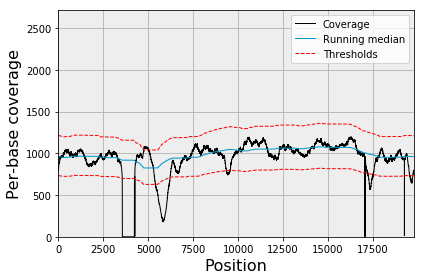

In [7]:
chromosome.plot_coverage()